📖 Background
You work for a major airline operating flights across the USA. Flight delays are a significant challenge for both the airline and passengers, causing disruptions, financial losses, and dissatisfaction. As part of the airline’s data analytics team, your goal is to analyze historical flight data to uncover delay patterns, identify operational inefficiencies, and predict delays before they occur. By identifying delay patterns, predicting delays, and uncovering the factors that contribute most to delays, you’ll be able to drive operational efficiency and enhance the overall passenger experience. Your insights will help the airline make data-driven decisions to optimize scheduling, improve on-time performance, and enhance passenger satisfaction.

Can you crack the code behind flight delays and revolutionize air travel?

💪 Challenge
Create a report summarizing your insights. Your report should explore the following questions:

1. How do different airlines compare in terms of their departure and arrival times? Are there noticeable trends in their on-time performance over the year? A well-structured visualization could help uncover patterns.
2. Are there particular months/weeks/time of day where there is a general trend of greater delays in flights across all carriers? If so, what could be the reasons?
3. Some airports seem to operate like clockwork, while others are notorious for disruptions. How do different airports compare when it comes to departure and arrival punctuality? Could location, traffic volume, or other factors play a role? Are there patterns that emerge when looking at delays across various airports?
4. [Optional 1] Predict whether a flight will have a delay of 15 minutes or more at departure.
5. [Optional 2] What underlying factors influence flight delays the most? Are some routes more prone to disruptions than others? Do external variables like time of day, distance, or carrier policies play a significant role? By analyzing the relationships between different features, you might discover unexpected insights.

In [1]:
import pandas as pd
flight_data = pd.read_csv('flights_data/flights.csv')
print(flight_data.head().to_string(index=False))

 id  year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  sched_arr_time  arr_delay carrier  flight tailnum origin dest  air_time  distance  hour  minute           time_hour                   name
  0  2013      1    1     517.0             515        2.0     830.0             819       11.0      UA    1545  N14228    EWR  IAH     227.0      1400     5      15 2013-01-01 05:00:00  United Air Lines Inc.
  1  2013      1    1     533.0             529        4.0     850.0             830       20.0      UA    1714  N24211    LGA  IAH     227.0      1416     5      29 2013-01-01 05:00:00  United Air Lines Inc.
  2  2013      1    1     542.0             540        2.0     923.0             850       33.0      AA    1141  N619AA    JFK  MIA     160.0      1089     5      40 2013-01-01 05:00:00 American Airlines Inc.
  3  2013      1    1     544.0             545       -1.0    1004.0            1022      -18.0      B6     725  N804JB    JFK  BQN     183.0      1576     5      4

In [3]:
flight_data.columns

Index(['id', 'year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour', 'name'],
      dtype='object')

In [4]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              336776 non-null  int64  
 1   year            336776 non-null  int64  
 2   month           336776 non-null  int64  
 3   day             336776 non-null  int64  
 4   dep_time        328521 non-null  float64
 5   sched_dep_time  336776 non-null  int64  
 6   dep_delay       328521 non-null  float64
 7   arr_time        328063 non-null  float64
 8   sched_arr_time  336776 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         336776 non-null  object 
 11  flight          336776 non-null  int64  
 12  tailnum         334264 non-null  object 
 13  origin          336776 non-null  object 
 14  dest            336776 non-null  object 
 15  air_time        327346 non-null  float64
 16  distance        336776 non-null  int64  
 17  hour      

In [5]:
flight_data.describe

<bound method NDFrame.describe of             id  year  month  day  dep_time  sched_dep_time  dep_delay  \
0            0  2013      1    1     517.0             515        2.0   
1            1  2013      1    1     533.0             529        4.0   
2            2  2013      1    1     542.0             540        2.0   
3            3  2013      1    1     544.0             545       -1.0   
4            4  2013      1    1     554.0             600       -6.0   
...        ...   ...    ...  ...       ...             ...        ...   
336771  336771  2013      9   30       NaN            1455        NaN   
336772  336772  2013      9   30       NaN            2200        NaN   
336773  336773  2013      9   30       NaN            1210        NaN   
336774  336774  2013      9   30       NaN            1159        NaN   
336775  336775  2013      9   30       NaN             840        NaN   

        arr_time  sched_arr_time  arr_delay  ... flight  tailnum origin dest  \
0        

In [6]:
missing = flight_data.isnull().sum()
print(missing[missing > 0])

dep_time     8255
dep_delay    8255
arr_time     8713
arr_delay    9430
tailnum      2512
air_time     9430
dtype: int64


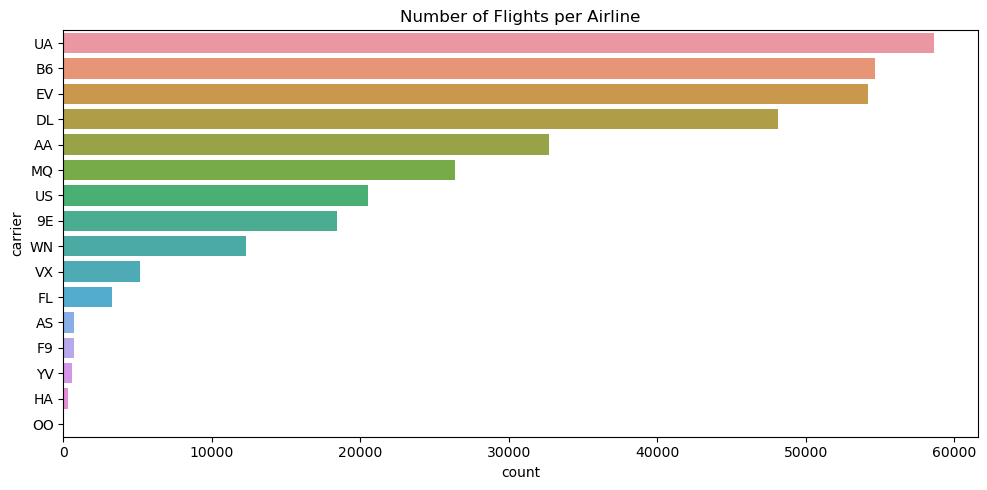

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

#count flights per airline
plt.figure(figsize=(10,5))
sns.countplot(y='carrier', data=flight_data, order=flight_data['carrier'].value_counts().index)
plt.title("Number of Flights per Airline")
plt.tight_layout()
plt.show()

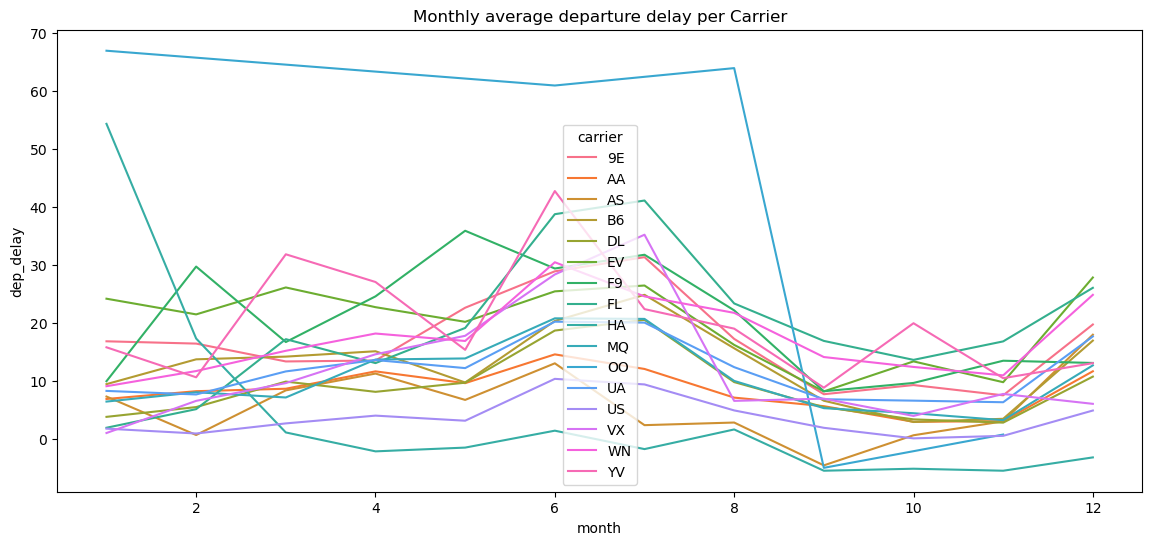

In [8]:
# Monthly trend per carrier
monthly_delay = flight_data.groupby(['month', 'carrier'])[['dep_delay', 'arr_delay']].mean().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_delay, x='month', y='dep_delay', hue='carrier')
plt.title("Monthly average departure delay per Carrier")
plt.show()


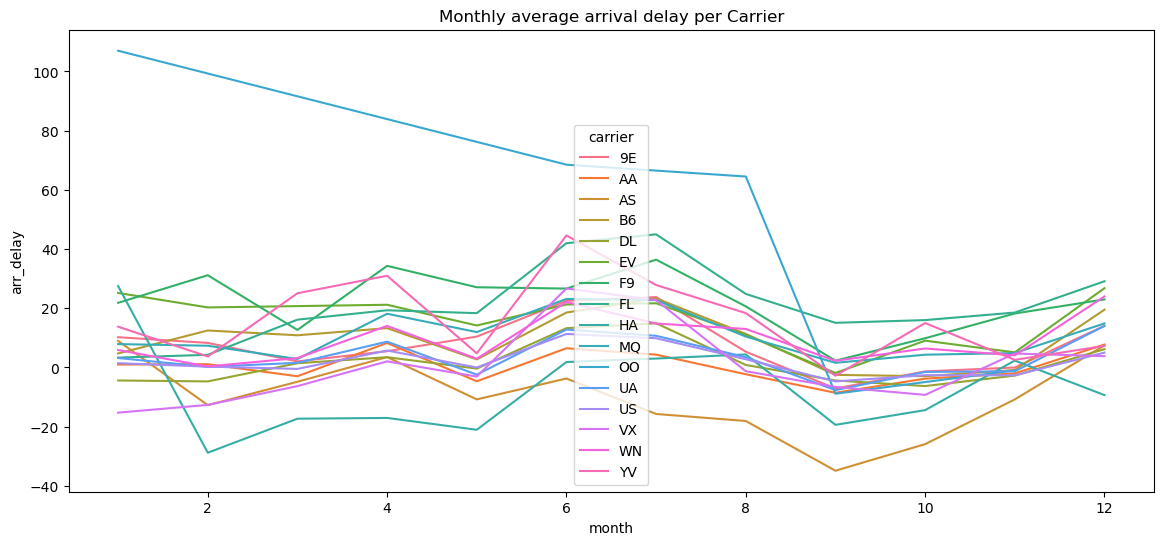

In [11]:
# Monthly trend per carrier
monthly_delay = flight_data.groupby(['month', 'carrier'])[['dep_delay', 'arr_delay']].mean().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_delay, x='month', y='arr_delay', hue='carrier')
plt.title("Monthly average arrival delay per Carrier")
plt.show()

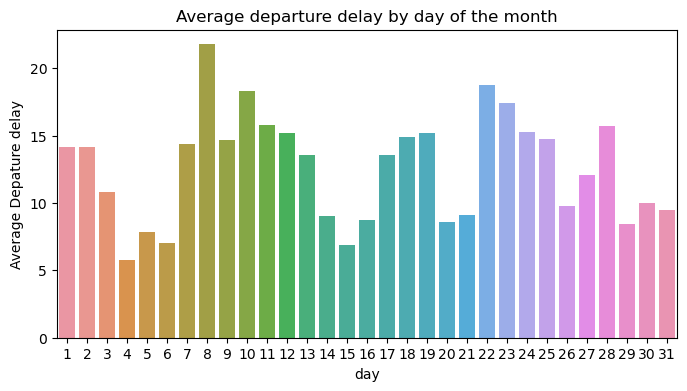

In [ ]:
# Departure delay by day of the month
day_delay = flight_data.groupby('day')[['dep_delay', 'arr_delay']].mean().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(data=day_delay, x='day', y='dep_delay')
plt.title("Average departure delay by day of the month")
plt.ylabel("Average Depature delay")
plt.show()

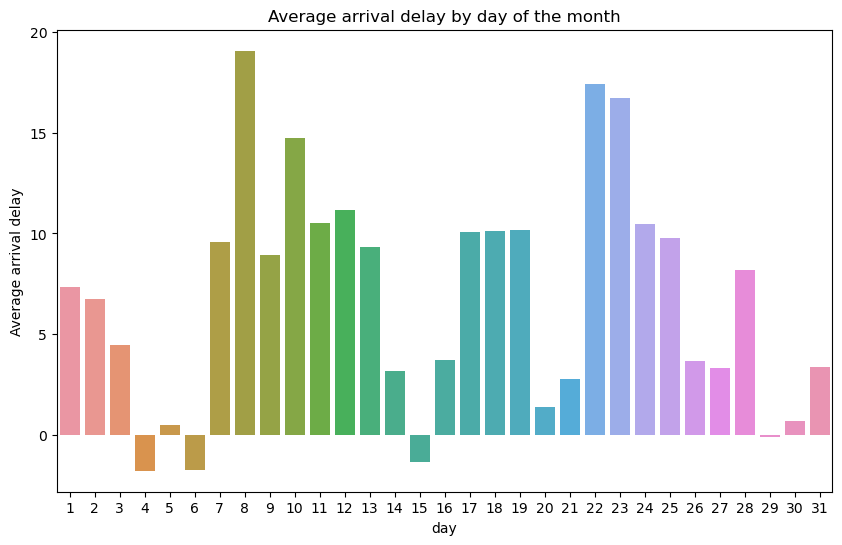

In [ ]:
# Arrival delay by day of the month

plt.figure(figsize=(10,6))
sns.barplot(data=day_delay, x='day', y='arr_delay')
plt.title("Average arrival delay by day of the month")
plt.ylabel("Average arrival delay")
plt.show()

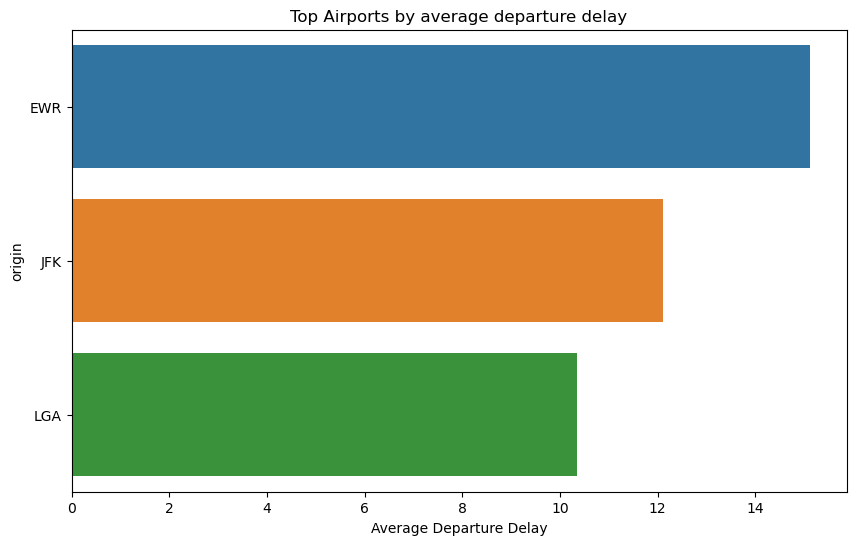

In [29]:
# Airport performance
origin_delays = flight_data.groupby('origin')[['dep_delay','arr_delay']].mean().sort_values(by='dep_delay', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=origin_delays['dep_delay'], y=origin_delays.index)
plt.title("Top Airports by average departure delay")
plt.xlabel("Average Departure Delay")
plt.show()

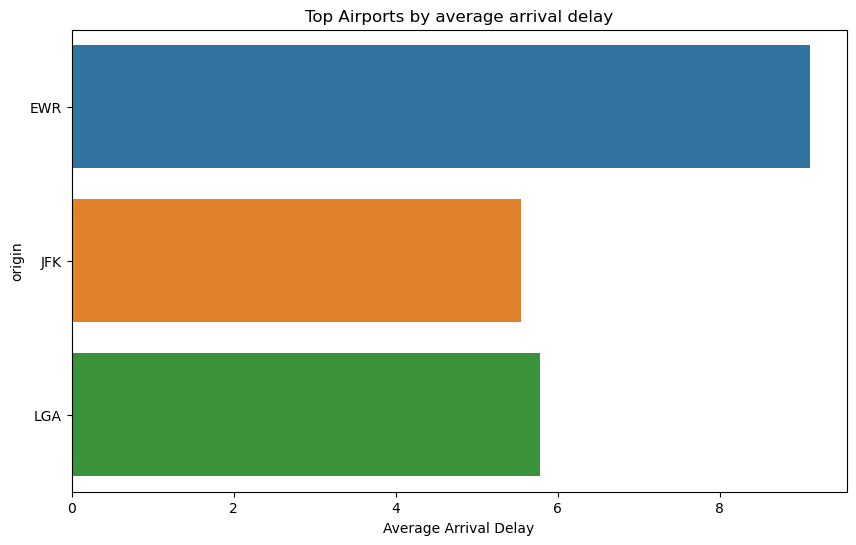

In [36]:
plt.figure(figsize=(10,6))
sns.barplot(data=origin_delays,x='arr_delay',y=origin_delays.index)
plt.title("Top Airports by average arrival delay")
plt.xlabel("Average Arrival Delay")
plt.show()

In [51]:
# Predict a departure delay >=15 mins
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

flight_data['delay_15'] = (flight_data['dep_delay'] >= 15).astype(int)

features = ['carrier', 'origin', 'dest', 'month','day']
X = flight_data[features].copy()
le = LabelEncoder()
for col in X.columns:
    X[col] = le.fit_transform(X[col])

y = flight_data['delay_15']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88     79346
           1       0.68      0.01      0.02     21687

    accuracy                           0.79    101033
   macro avg       0.73      0.50      0.45    101033
weighted avg       0.76      0.79      0.69    101033



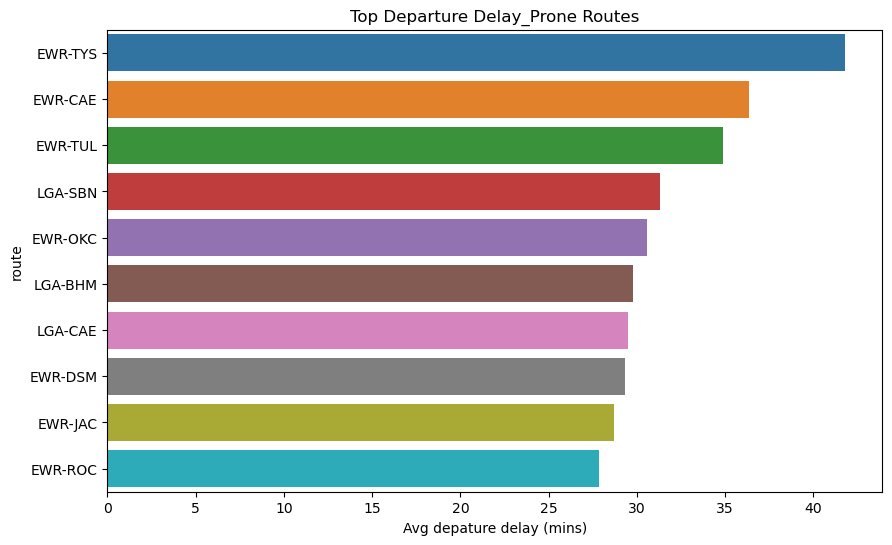

In [47]:
# Route-based insights

flight_data['route'] = flight_data['origin'] + "-" + flight_data['dest']
route_delay = flight_data.groupby('route')[['dep_delay', 'arr_delay']].mean().sort_values(by='dep_delay', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=route_delay, x='dep_delay', y=route_delay.index)
plt.title("Top Departure Delay_Prone Routes")
plt.xlabel("Avg depature delay (mins)")
plt.show()

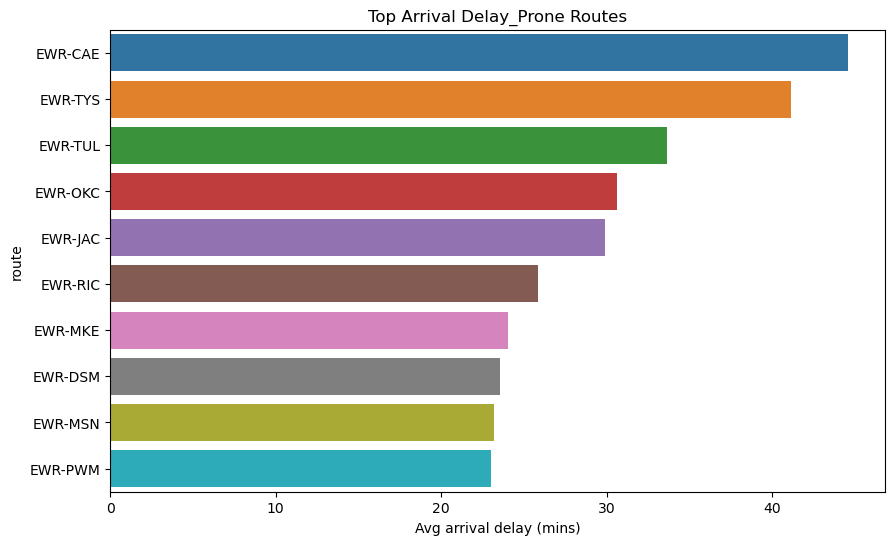

In [48]:
# Route-based insights

flight_data['route'] = flight_data['origin'] + "-" + flight_data['dest']
route_delay = flight_data.groupby('route')[['dep_delay', 'arr_delay']].mean().sort_values(by='arr_delay', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=route_delay, x='arr_delay', y=route_delay.index)
plt.title("Top Arrival Delay_Prone Routes")
plt.xlabel("Avg arrival delay (mins)")
plt.show()

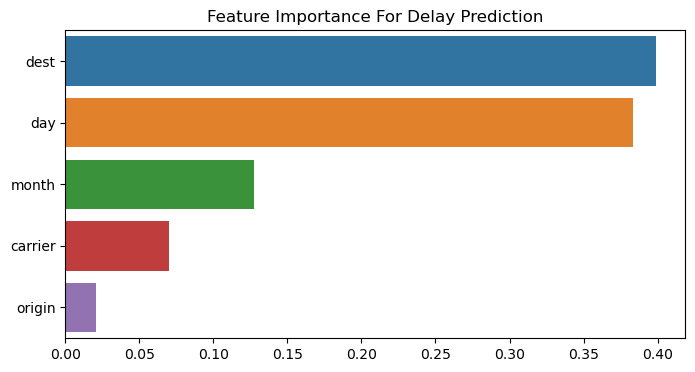

In [38]:
# Feature importance on delay prediction
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importance For Delay Prediction")
plt.show()